In [1]:
#Github link
#https://github.com/AndrewHord555/ECGR-4105-HW0

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [3]:
housing = pd.read_csv('C:/Users/andre/Desktop/ECGR HW/ECGR 4105/Housing.csv')
housing2 = pd.read_csv('C:/Users/andre/Desktop/ECGR HW/ECGR 4105/Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
m = len(housing)

In [5]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing2[varlist] = housing2[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size=0.7, test_size = 0.3, random_state = 42)

from sklearn.model_selection import train_test_split
S_Train, S_Test = train_test_split(housing2, train_size=0.7, test_size = 0.3, random_state = 42)

In [7]:
num_vars = ['area', 'bedrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
df_Newtest.head()

,area,bedrooms,stories,parking,price
316,5900,4,2,1,4060000
77,6500,3,3,0,6650000
360,4040,2,1,0,3710000
90,5000,3,2,0,6440000
493,3960,3,1,0,2800000


In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#define standard scaler
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(20)
df_Newtest.head(20)

,area,bedrooms,stories,parking,price
316,0.365217,0.50,0.333333,0.333333,0.200000
77,0.417391,0.25,0.666667,0.000000,0.424242
360,0.203478,0.00,0.000000,0.000000,0.169697
90,0.286957,0.25,0.333333,0.000000,0.406061
493,0.196522,0.25,0.000000,0.000000,0.090909
209,0.436522,0.25,0.000000,0.000000,0.272727
176,0.593043,0.25,0.000000,0.666667,0.303030
249,0.286087,0.50,0.333333,0.000000,0.241818
516,0.133913,0.00,0.000000,0.333333,0.060606
426,0.086957,0.25,0.000000,0.000000,0.138788


In [9]:
y_Newtrain = df_Newtrain.pop('price')
y2_Newtest = df_Newtest.pop('price')
X_Newtrain = df_Newtrain
X2_Newtest = df_Newtest

In [10]:
X_Newtrain.head()

,area,bedrooms,stories,parking
126,0.378694,0.4,0.0,0.666667
363,0.132921,0.2,0.0,0.000000
370,0.180756,0.2,0.0,0.666667
31,0.367698,0.4,1.0,0.666667
113,0.547766,0.4,0.0,0.666667


In [11]:
X2_Newtest.head()

,area,bedrooms,stories,parking
316,0.365217,0.50,0.333333,0.333333
77,0.417391,0.25,0.666667,0.000000
360,0.203478,0.00,0.000000,0.000000
90,0.286957,0.25,0.333333,0.000000
493,0.196522,0.25,0.000000,0.000000


In [12]:
y_Newtrain.head()
y2_Newtest.head()

316    0.200000
77     0.424242
360    0.169697
90     0.406061
493    0.090909
Name: price, dtype: float64

In [13]:
Y = y_Newtrain.values
Y2 = y2_Newtest.values

In [14]:
X0 = df_Newtrain.values[:,0]

In [15]:
################################################################ Part 1 of the HW

In [16]:
price = df_train.values[:, 0]
area = df_train.values[:, 1]
bedrooms = df_train.values[:, 2]
bathrooms = df_train.values[:, 3]
stories = df_train.values[:, 4]
mainroad = df_train.values[:, 5]
guestroom = df_train.values[:, 6]
basement = df_train.values[:, 7]
hotwater = df_train.values[:, 8]
ac = df_train.values[:, 9]
parking = df_train.values[:, 10]
prefarea = df_train.values[:, 11]
furnished = df_train.values[:, 12]


price2 = df_test.values[:, 0]
area2 = df_test.values[:, 1]
bedroom2 = df_test.values[:, 2]
bathrooms2 = df_test.values[:, 3]
stories2 = df_test.values[:, 4]
mainroad2 = df_test.values[:, 5]
guestroom2 = df_test.values[:, 6]
basement2 = df_test.values[:, 7]
hotwater2 = df_test.values[:, 8]
ac2 = df_test.values[:, 9]
parking2 = df_test.values[:, 10]
prefarea2 = df_test.values[:, 11]
furnished2 = df_test.values[:, 12]

X_f = df_test.values[:,(1,2,3,4,10)]
m = len(df_test)
X_00 = np.ones((m,1))
X_f = np.hstack((X_00, X_f))
Y = df_train.values[:,0]
Y2 = df_test.values[:,0]
Y.astype('int64')
Y2.astype('int64')


m = len(df_train) 
n = len(df_test)
M = len(S_Train) #length of standardized set
N = len(S_Test) #length of standardized test

In [17]:
X_0 = np.ones((m, 1))
X_1 = area.reshape(m,1)
X_2 = bedrooms.reshape(m,1)
X_3 = bathrooms.reshape(m,1)
X_4 = stories.reshape(m,1)
X_5 = mainroad.reshape(m,1)
X_6 = guestroom.reshape(m,1)
X_7 = basement.reshape(m,1)
X_8 = hotwater.reshape(m,1)
X_9 = ac.reshape(m,1)
X_10 = parking.reshape(m,1)
X_11 = prefarea.reshape(m,1)
X_12 = furnished.reshape(m,1)

In [18]:
X_0T = np.ones((n, 1))
X_1T = area2.reshape(n,1)
X_2T = bedroom2.reshape(n,1)
X_3T = bathrooms2.reshape(n,1)
X_4T = stories2.reshape(n,1)
X_5T = mainroad2.reshape(n,1)
X_6T = guestroom2.reshape(n,1)
X_7T = basement2.reshape(n,1)
X_8T = hotwater2.reshape(n,1)
X_9T = ac2.reshape(n,1)
X_10T = parking2.reshape(n,1)
X_11T = prefarea2.reshape(n,1)
X_12T = furnished2.reshape(n,1)

In [19]:
area = np.hstack((X_0, X_1))
bedrooms = np.hstack((X_0, X_2))
stories = np.hstack((X_0, X_4))
mainroad = np.hstack((X_0, X_5))
guestroom = np.hstack((X_0, X_6))
basement = np.hstack((X_0, X_7))
hotwater = np.hstack((X_0, X_8))
ac = np.hstack((X_0, X_9))
parking = np.hstack((X_0, X_10))
prefarea = np.hstack((X_0, X_11))
furnished = np.hstack((X_0, X_12))

Q_1a = np.hstack((X_0, X_1,X_2,X_3,X_4,X_10)) #Value for problem 1 linear regression
Q_1aa = np.hstack((X_0T, X_1T,X_2T,X_3T,X_4T,X_10T)) #Value for problem 1 linear regression


In [20]:
theta1 = np.zeros(6) #Theta for problem 1 Linear regression
theta2 = np.zeros(6)
iterations = 1500;
alpha = 0.000001;



In [21]:
def compute_cost(Q_1a, Y, theta1, lam, Reg): 
    
    predictions = Q_1a.dot(theta1)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    if (Reg == 0):
        J = 1 / (2 * m) * np.sum(sqrErrors) 
    else:
        J = 1/(2*m) * (np.sum(sqrErrors) + lam * (np.sum(theta1) - theta1[0]))       
        
    return J

In [22]:
def gradient_descent(Q_1a, Q_1aa, Y, Y2,  lam, Reg, theta1, alpha, iterations):
    
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = Q_1a.dot(theta1)
        errors = np.subtract(predictions/10000, Y/10000)
        sum_delta = (alpha / m) * Q_1a.transpose().dot(errors);
        if (Reg == 0):
            theta1 = theta1 - sum_delta
        else:
            theta1 = theta1 * (1-alpha *(lam/m))- sum_delta
 
        cost_history[i] = (compute_cost(Q_1a, Y, theta1, lam, Reg))
        cost_history2[i] = (compute_cost(Q_1aa, Y2, theta1, lam, Reg))
    
    return theta1, cost_history ,cost_history2

In [23]:
theta1, cost_history, cost_history2 = gradient_descent(Q_1a, Q_1aa, price, price2, 0.5, 0, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [0.19624957409340596 847.5259818603201 0.6315374431760217
 0.29431099721315224 0.4281817100896772 0.15648885712766755]
cost_history = [1.28406656e+13 1.27707279e+13 1.27012236e+13 ... 1.55437732e+12
 1.55437096e+12 1.55436463e+12]


Text(0.5, 1.0, 'Convergence of gradient descent')

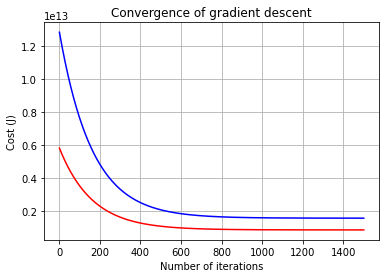

In [24]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [25]:
#Problem 1b
#All variables as inputs

In [26]:
Q_1b = np.hstack((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11))
Q_1bb =  np.hstack((X_0T,X_1T,X_2T,X_3T,X_4T,X_5T,X_6T,X_7T,X_8T,X_9T,X_10T,X_11T))

In [27]:
theta1 = np.zeros(12) #Theta for problem 1 Linear regression
iterations = 1500;
alpha = 0.000001;

In [28]:
theta1, cost_history, cost_history2 = gradient_descent(Q_1b, Q_1bb, price, price2, 0.5, 0, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [0.19624956548666614 847.5259441242486 0.631537417403601
 0.29431098625909047 0.428181694149837 0.17311097027297323
 0.05037480128460985 0.09399855842959766 0.014870977285428199
 0.0951602348352203 0.1564888513040716 0.05892955892613832]
cost_history = [1.28406656e+13 1.27707279e+13 1.27012236e+13 ... 1.55437720e+12
 1.55437083e+12 1.55436451e+12]


Text(0.5, 1.0, 'Convergence of gradient descent')

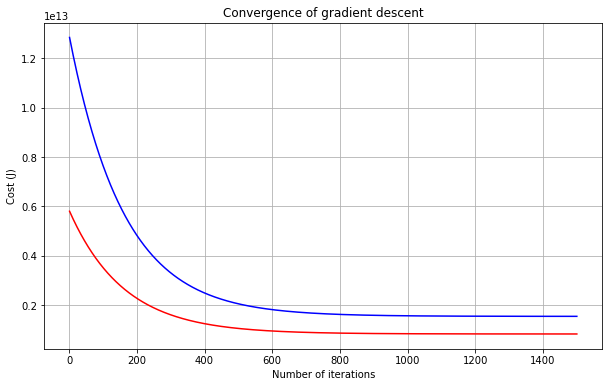

In [29]:
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [30]:
#Problem 2a
#input normalization
#input standardization
#Part of preprocessing logic
#One training for normalization, and another one for normaliation

In [31]:
# Variables called: area, bedrooms, bathrooms, stories, parking

In [32]:
num_vars=['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]
df_Newtrain.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,5880000,7160,3,1,1,1,0,1,0,0,2,1
363,3710000,3584,2,1,1,1,0,0,1,0,0,0
370,3640000,4280,2,1,1,1,0,0,0,1,2,0
31,8400000,7000,3,1,4,1,0,0,0,1,2,0
113,6083000,9620,3,1,1,1,0,1,0,0,2,1


In [33]:
scaler=MinMaxScaler()
df_Newtrain[num_vars]=scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,0.393333,0.378694,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
363,0.186667,0.132921,0.2,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.000000,0.0
370,0.180000,0.180756,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
31,0.633333,0.367698,0.4,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
113,0.412667,0.547766,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
222,0.286667,0.516564,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,0.0
462,0.126667,0.035052,0.4,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
177,0.332667,0.302405,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,1.0
57,0.523333,0.505155,0.6,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0
244,0.266667,0.252234,0.4,0.000000,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0


In [34]:
scaler=MinMaxScaler()
df_Newtest[num_vars]=scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,0.200000,0.365217,0.50,0.5,0.333333,0.0,0.0,1.0,0.0,0.0,0.333333,0.0
77,0.424242,0.417391,0.25,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
360,0.169697,0.203478,0.00,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
90,0.406061,0.286957,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
493,0.090909,0.196522,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
209,0.272727,0.436522,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
176,0.303030,0.593043,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
249,0.241818,0.286087,0.50,0.5,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
516,0.060606,0.133913,0.00,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.333333,0.0
426,0.138788,0.086957,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [35]:
y_Normtrain=df_Newtrain
df_Normtrain=df_Newtrain

In [36]:
y_Normtest=df_Newtest
df_Normtest=df_Newtest

In [37]:
df_Normtrain.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,0.393333,0.378694,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
363,0.186667,0.132921,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0
370,0.180000,0.180756,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
31,0.633333,0.367698,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
113,0.412667,0.547766,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0


In [38]:
df_Normtest.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,0.200000,0.365217,0.50,0.5,0.333333,0.0,0.0,1.0,0.0,0.0,0.333333,0.0
77,0.424242,0.417391,0.25,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
360,0.169697,0.203478,0.00,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
90,0.406061,0.286957,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
493,0.090909,0.196522,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [39]:
y_Normtrain.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
126,0.393333,0.378694,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0
363,0.186667,0.132921,0.2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.0
370,0.180000,0.180756,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
31,0.633333,0.367698,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
113,0.412667,0.547766,0.4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,1.0


In [40]:
y_Normtest.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,0.200000,0.365217,0.50,0.5,0.333333,0.0,0.0,1.0,0.0,0.0,0.333333,0.0
77,0.424242,0.417391,0.25,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
360,0.169697,0.203478,0.00,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
90,0.406061,0.286957,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
493,0.090909,0.196522,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [41]:
Y = y_Normtrain.values

In [42]:
Y2 = y_Normtest.values

In [43]:
price = df_Normtrain.values[:, 0]
area = df_Normtrain.values[:, 1]
bedrooms = df_Normtrain.values[:, 2]
bathrooms = df_Normtrain.values[:, 3]
stories = df_Normtrain.values[:, 4]
mainroad = df_Normtrain.values[:, 5]
guestroom = df_Normtrain.values[:, 6]
basement = df_Normtrain.values[:, 7]
hotwater = df_Normtrain.values[:, 8]
ac = df_Normtrain.values[:, 9]
parking = df_Normtrain.values[:, 10]
prefarea = df_Normtrain.values[:, 11]
#furnished = df_Normtrain.values[:, 12]


price2 = df_Normtest.values[:, 0]
area2 = df_Normtest.values[:, 1]
bedroom2 = df_Normtest.values[:, 2]
bathrooms2 = df_Normtest.values[:, 3]
stories2 = df_Normtest.values[:, 4]
mainroad2 = df_Normtest.values[:, 5]
guestroom2 = df_Normtest.values[:, 6]
basement2 = df_Normtest.values[:, 7]
hotwater2 = df_Normtest.values[:, 8]
ac2 = df_Normtest.values[:, 9]
parking2 = df_Normtest.values[:, 10]
prefarea2 = df_Normtest.values[:, 11]
#furnished2 = df_Normtest.values[:, 12]


In [44]:
X_0 = np.ones((m, 1))
X_1 = area.reshape(m,1)
X_2 = bedrooms.reshape(m,1)
X_3 = bathrooms.reshape(m,1)
X_4 = stories.reshape(m,1)
X_5 = mainroad.reshape(m,1)
X_6 = guestroom.reshape(m,1)
X_7 = basement.reshape(m,1)
X_8 = hotwater.reshape(m,1)
X_9 = ac.reshape(m,1)
X_10 = parking.reshape(m,1)
X_11 = prefarea.reshape(m,1)
#X_12 = furnished.reshape(m,1)

In [45]:
X_0T = np.ones((n, 1))
X_1T = area2.reshape(n,1)
X_2T = bedroom2.reshape(n,1)
X_3T = bathrooms2.reshape(n,1)
X_4T = stories2.reshape(n,1)
X_5T = mainroad2.reshape(n,1)
X_6T = guestroom2.reshape(n,1)
X_7T = basement2.reshape(n,1)
X_8T = hotwater2.reshape(n,1)
X_9T = ac2.reshape(n,1)
X_10T = parking2.reshape(n,1)
X_11T = prefarea2.reshape(n,1)
#X_12T = furnished2.reshape(n,1)

In [46]:
Q_2a = np.hstack((X_0,X_1,X_2,X_3,X_4,X_10)) #Value for problem 2 linear regression
Q_2aa = np.hstack((X_0T,X_1T,X_2T,X_3T,X_4T,X_10T))

In [47]:
theta1 = np.zeros(6) #Theta for problem 1 Linear regression
theta2 = np.zeros(6)
iterations = 150000;
alpha = 0.1;

In [48]:
theta1, cost_history,cost_history2 = gradient_descent(Q_2a,Q_2aa, price, price2, 0.5,0, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [0.17671026 0.06049915 0.07995048 0.03349551 0.06765923 0.06024077]
cost_history = [0.05540086 0.05539965 0.05539844 ... 0.01099292 0.01099289 0.01099287]


Text(0.5, 1.0, 'Normalized 2A')

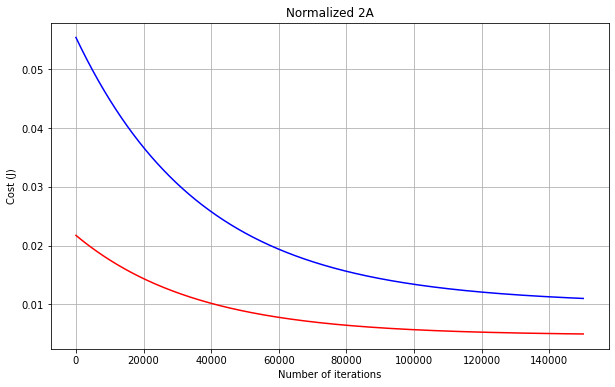

In [49]:
#Normalized Gradient Decent 
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized 2A')

In [50]:
scaler=StandardScaler()
housing2[num_vars]= scaler.fit_transform(housing2[num_vars])
df_Newtest.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,0.200000,0.365217,0.50,0.5,0.333333,0.0,0.0,1.0,0.0,0.0,0.333333,0.0
77,0.424242,0.417391,0.25,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
360,0.169697,0.203478,0.00,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
90,0.406061,0.286957,0.25,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
493,0.090909,0.196522,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
209,0.272727,0.436522,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
176,0.303030,0.593043,0.25,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
249,0.241818,0.286087,0.50,0.5,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
516,0.060606,0.133913,0.00,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.333333,0.0
426,0.138788,0.086957,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [51]:

#Housing 2 Test2
Sprice2 = S_Test.values[:, 0] 
Sarea2 = S_Test.values[:, 1]
Sbedroom2 = S_Test.values[:, 2]
Sbathrooms2 = S_Test.values[:, 3]
Sstories2 = S_Test.values[:, 4]
Smainroad2 = S_Test.values[:, 5]
Sguestroom2 = S_Test.values[:, 6]
Sbasement2 = S_Test.values[:, 7]
Shotwater2 = S_Test.values[:, 8]
Sac2 = S_Test.values[:, 9]
Sparking2 = S_Test.values[:, 10]
Sprefarea2 = S_Test.values[:, 11]
#furnished2 = df_Normtest.values[:, 12]


#Housing 2 Train
Sprice = S_Train.values[:, 0]
Sarea = S_Train.values[:, 1]
Sbedrooms = S_Train.values[:, 2]
Sbathrooms = S_Train.values[:, 3]
Sstories = S_Train.values[:, 4]
Smainroad = S_Train.values[:, 5]
Sguestroom = S_Train.values[:, 6]
Sbasement = S_Train.values[:, 7]
Shotwater = S_Train.values[:, 8]
Sac = S_Train.values[:, 9]
Sparking = S_Train.values[:, 10]
Sprefarea = S_Train.values[:, 11]
#furnished = df_Normtrain.values[:, 12]

In [52]:
#Reshape Test 2
S_0T = np.ones((N,1))
S_1T = Sprice2.reshape(N,1)
S_2T = Sarea2.reshape(N,1)
S_3T = Sbedroom2.reshape(N,1)
S_4T = Sbathrooms2.reshape(N,1)
S_5T = Sstories2.reshape(N,1)
S_6T = Smainroad2.reshape(N,1)
S_7T = Sbasement2.reshape(N,1)
S_8T = Shotwater2.reshape(N,1)
S_9T = Sac2.reshape(N,1)
S_10T = Sparking2.reshape(N,1)
S_11T = Sprefarea2.reshape(N,1)

#Reshape Train 2
S_0 = np.ones((M,1))
S_1 = Sprice.reshape(M,1)
S_2 = Sarea.reshape(M,1)
S_3 = Sbedrooms.reshape(M,1)
S_4 = Sbathrooms.reshape(M,1)
S_5 = Sstories.reshape(M,1)
S_6 = Smainroad.reshape(M,1)
S_7 = Sbasement.reshape(M,1)
S_8 = Shotwater.reshape(M,1)
S_9 = Sac.reshape(M,1)
S_10 = Sparking.reshape(M,1)
S_11 = Sprefarea.reshape(M,1)

In [53]:
Q_2S = np.hstack((S_0,S_2,S_3,S_4,S_5,S_10)) #Value for problem 2 linear regression
Q_2SS = np.hstack((S_0T,S_1T,S_2T,S_3T,S_4T,S_10T))

In [54]:
theta1 = np.zeros(6) #Theta for problem 1 Linear regression
theta2 = np.zeros(6)
iterations = 1500;
alpha = 0.1;

In [55]:
theta1, cost_history,cost_history2 = gradient_descent(Q_2S,Q_2SS, price, price2, 0.5,0, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [nan nan nan nan nan nan]
cost_history = [4.31809013e+03 4.13063121e+08 3.95131973e+13 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Standardized 2A')

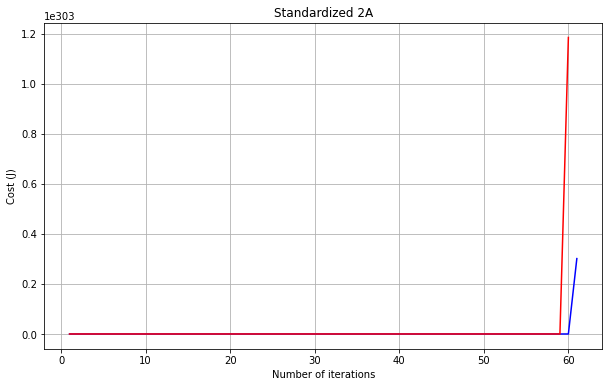

In [56]:
#Normalized Gradient Decent 
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized 2A')

In [57]:
#Problem 2 B
#Normalization and Linerization of all Variables

In [58]:
Q_2b = np.hstack((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11))
Q_2bb = np.hstack((X_0T,X_1T,X_2T,X_3T,X_4T,X_5T,X_6T,X_7T,X_8T,X_9T,X_10T,X_11T))

In [59]:
theta1 = np.zeros(12) #Theta for problem 1 Linear regression
theta2 = np.zeros(12)
iterations = 150000;
alpha = 0.1;

In [60]:
theta1, cost_history, cost_history2 = gradient_descent(Q_2b, Q_2bb, price, price2, 0.5, 0, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [0.10187784 0.03954911 0.0501752  0.02615533 0.04748863 0.09474924
 0.03092697 0.04483595 0.01033532 0.06251289 0.04099926 0.03782889]
cost_history = [0.05539972 0.05539738 0.05539503 ... 0.00815218 0.00815218 0.00815217]


Text(0.5, 1.0, 'Normalized 2B')

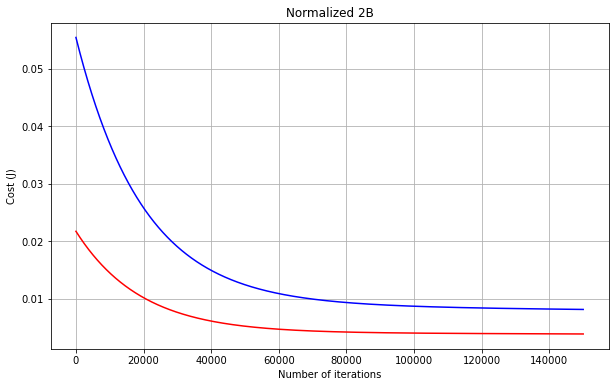

In [61]:
#Normalized Gradient Decent 
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Normalized 2B')

In [62]:
Q_2b = np.hstack((S_0,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,S_10,S_11))
Q_2bb = np.hstack((S_0T,S_1T,S_2T,S_3T,S_4T,S_5T,S_6T,S_7T,S_8T,S_9T,S_10T,S_11T))

In [63]:
theta1 = np.zeros(12) #Theta for problem 1 Linear regression
theta2 = np.zeros(12)
iterations = 1500;
alpha = 0.000001;

In [64]:
theta1, cost_history, cost_history2 = gradient_descent(Q_2b, Q_2bb, price, price2, 0.5,0, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [nan nan nan nan nan nan nan nan nan nan nan nan]
cost_history = [3.57866282e+05 2.38433710e+12 1.58859991e+19 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Standardized 2B')

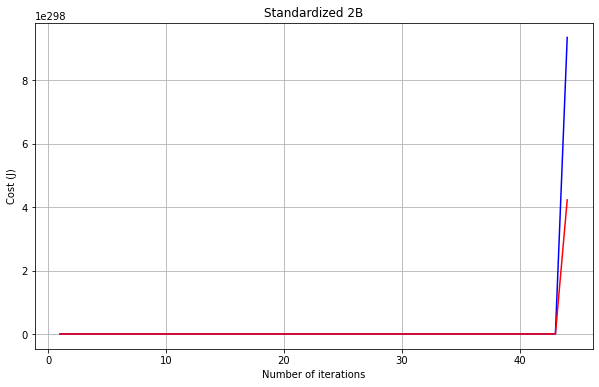

In [65]:
#Linearized Gradient Decent 
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardized 2B')

In [66]:
#Coclusion Question 2A
#In the linearization section, Normalization of the data provided a better gradient decent of the cost function in reguards to the input variables. 
#When Linearizing the function, the cost function broke, providing a very choppy regression that diverges to infiity, rather then 
#converging like the normalization regression.

In [67]:
#Problem 3A
#Parameters Pelelties = Linear Regression + Regularization
#Regulization = parameter* np.sum[1,n](theta_j^2)
#n = input variables

In [68]:
Q_3a = np.hstack((X_0, X_1,X_2,X_3,X_4,X_10)) #Value for problem 3a linear regression (Normalized)
Q_3aa = np.hstack((X_0T, X_1T,X_2T,X_3T,X_4T,X_10T))

In [69]:
Q_3S = np.hstack((S_0, S_1,S_2,S_3,S_4,S_10)) #Value for problem 3a linear regression (Standardized)
Q_3SS = np.hstack((S_0T, S_1T,S_2T,S_3T,S_4T,S_10T))

In [70]:
theta1 = np.zeros(6) #Theta for problem 1 Linear regression
theta2 = np.zeros(6)
iterations = 1500;
alpha = 0.01;

In [71]:
theta1, cost_history, cost_history2 = gradient_descent(Q_3a, Q_3aa, price, price2, 0.25, 1, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [4.27787082e-04 1.23027622e-04 1.81912708e-04 5.84185008e-05
 1.40430442e-04 1.22080256e-04]
cost_history = [0.05540195 0.05540183 0.05540171 ... 0.05522212 0.055222   0.05522188]


Text(0.5, 1.0, 'Penelty of Normalization 3A')

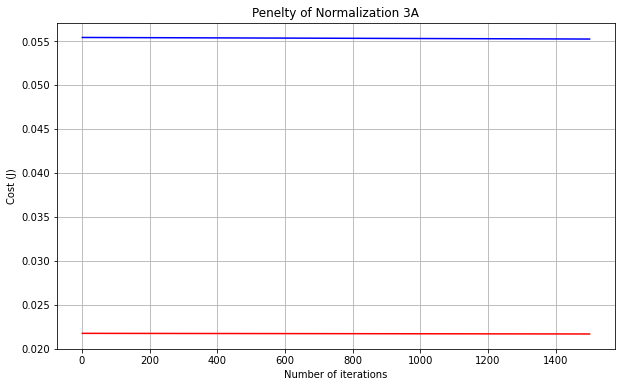

In [72]:
#Pelelty plot
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Penelty of Normalization 3A')

In [73]:
theta1, cost_history, cost_history2 = gradient_descent(Q_3S, Q_3SS, price, price2, 0.25, 1, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [nan nan nan nan nan nan]
cost_history = [1.30561630e+20 8.70560274e+34 5.80473139e+49 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Penelty of Standardizarion 3A')

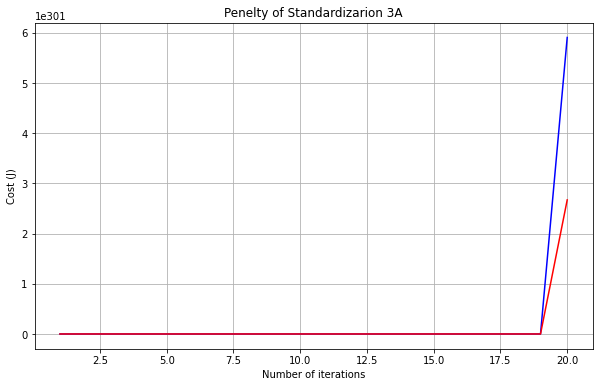

In [74]:
#Pelelty plot
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Penelty of Standardizarion 3A')

In [75]:
#Conclusion Question 3A
#After adding the parameter penelty to both plots, the output is very much what would be expected.
#The penelties agressively forve the gradient twords the mean, where a harsher input from the regularization is applied, when there is a larger
#dieviation from the expected loss.

In [76]:
#Problem 3b
#Parameters Penelties with all variables

In [77]:
Q_3b = np.hstack((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11))
Q_3bb = np.hstack((X_0T,X_1T,X_2T,X_3T,X_4T,X_5T,X_6T,X_7T,X_8T,X_9T,X_10T,X_11T))

Q_3S = np.hstack((S_0,S_1,S_2,S_3,S_4,S_5,S_6,X_7,S_8,S_9,S_10,S_11))
Q_3SS = np.hstack((S_0T,S_1T,S_2T,S_3T,S_4T,S_5T,S_6T,S_7T,S_8T,S_9T,S_10T,S_11T))
    

In [78]:
theta1 = np.zeros(12) #Theta for problem 1 Linear regression
theta2 = np.zeros(12)
iterations = 1500;
alpha = 0.01;

In [79]:
theta1, cost_history, cost_history2 = gradient_descent(Q_3b, Q_3bb, price, price2, 0.25, 1, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [4.27400349e-04 1.22925965e-04 1.81757990e-04 5.83811008e-05
 1.40324235e-04 3.93689834e-04 1.05919328e-04 1.79767308e-04
 2.68488557e-05 1.89097702e-04 1.21984031e-04 1.31465915e-04]
cost_history = [0.05540184 0.0554016  0.05540137 ... 0.05505397 0.05505374 0.05505351]


Text(0.5, 1.0, 'Penalty of Normalization 3B')

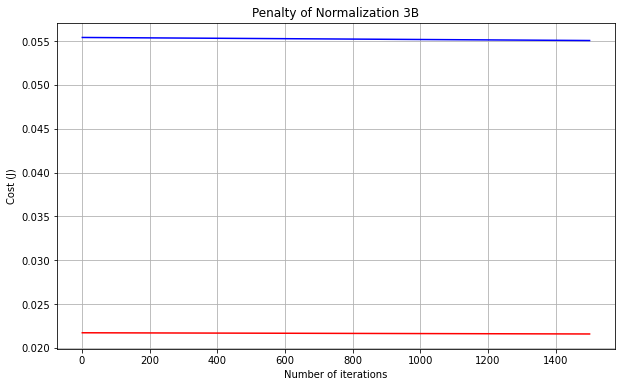

In [80]:
#Pelelty plot
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Penalty of Normalization 3B')

In [81]:
theta1, cost_history, cost_history2 = gradient_descent(Q_3S, Q_3SS, price, price2, 0.25, 1, theta1, alpha, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history)

Final value of theta = [nan nan nan nan nan nan nan nan nan nan nan nan]
cost_history = [1.30346236e+20 8.69124073e+34 5.79515507e+49 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Penalty of Standardiation 3B')

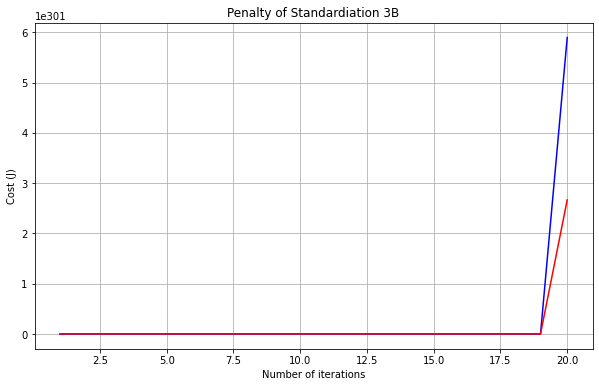

In [82]:
#Pelelty plot
plt.plot(range(1,iterations+1),cost_history,color='blue')
plt.plot(range(1,iterations+1),cost_history2,color='red')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Penalty of Standardiation 3B')

In [ ]:
#Conclusion Question 3B
#After adding the parameter penelty to both plots, the output is very much what would be expected.
#The penelties agressively forve the gradient twords the mean, where a harsher input from the regularization is applied, when there is a larger
#dieviation from the expected loss.